# Predictive Analytics for Diabetes Prevention

In [2]:
import pandas as pd
import numpy as np


import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer


import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve


In [3]:
# Load data from a CSV file with specified encoding
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

# Display the first few rows of the dataframe
df.head(5)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Data Exploration


In data exploration we have seen the total number of features and instances, info of the dataframe that includes its data types. We have seen the statstics of the dataset considered.

In [4]:
df.shape

(253680, 22)

```
 We have 253,680 entries with 22 columns including diabetes status, blood pressure, cholesterol levels, BMI, smoking status,
 physical activity, fruit consumption,  healthcare access, and socio-economic factors.


```

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

```
We dont have categorical data and all the features are of float datatype
```

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


```
* Diabetes_binary: This is our target variable with about 13.9% of the cases having diabetes. It's a binary variable,
so classification models will be suitable.

* Key statistics suggest a broad range of demographic and health-related attributes, with fields ranging from
binary indicators (e.g., smoker: yes/no) to continuous measures (e.g., BMI, age).

* HighBP, HighChol, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare,
 NoDocbcCost,DiffWalk, Sex: These are binary features, representing presence or absence of a condition or behavior.

* BMI, GenHlth, MentHlth, PhysHlth: Continuous variables with a range of values that might need normalization or scaling during
preprocessing.

* Age, Education, Income: Ordinal variables with a defined order but inconsistent intervals.


```



## Data Preprocessing

> Data preprocessing involving handling missing values, noise, outliers, duplicate data. Standardising the format etc..

In [7]:
# Check for missing values and data types
missing_values = df.isnull().sum()
data_types = df.dtypes

# Summary of the dataset
summary = {
    'Missing Values': missing_values,
    'Data Types': data_types
}

summary_df = pd.DataFrame(summary)

summary_df

,Missing Values,Data Types
Diabetes_binary,0,float64
HighBP,0,float64
HighChol,0,float64
CholCheck,0,float64
BMI,0,float64
Smoker,0,float64
Stroke,0,float64
HeartDiseaseorAttack,0,float64
PhysActivity,0,float64
Fruits,0,float64


<Axes: >

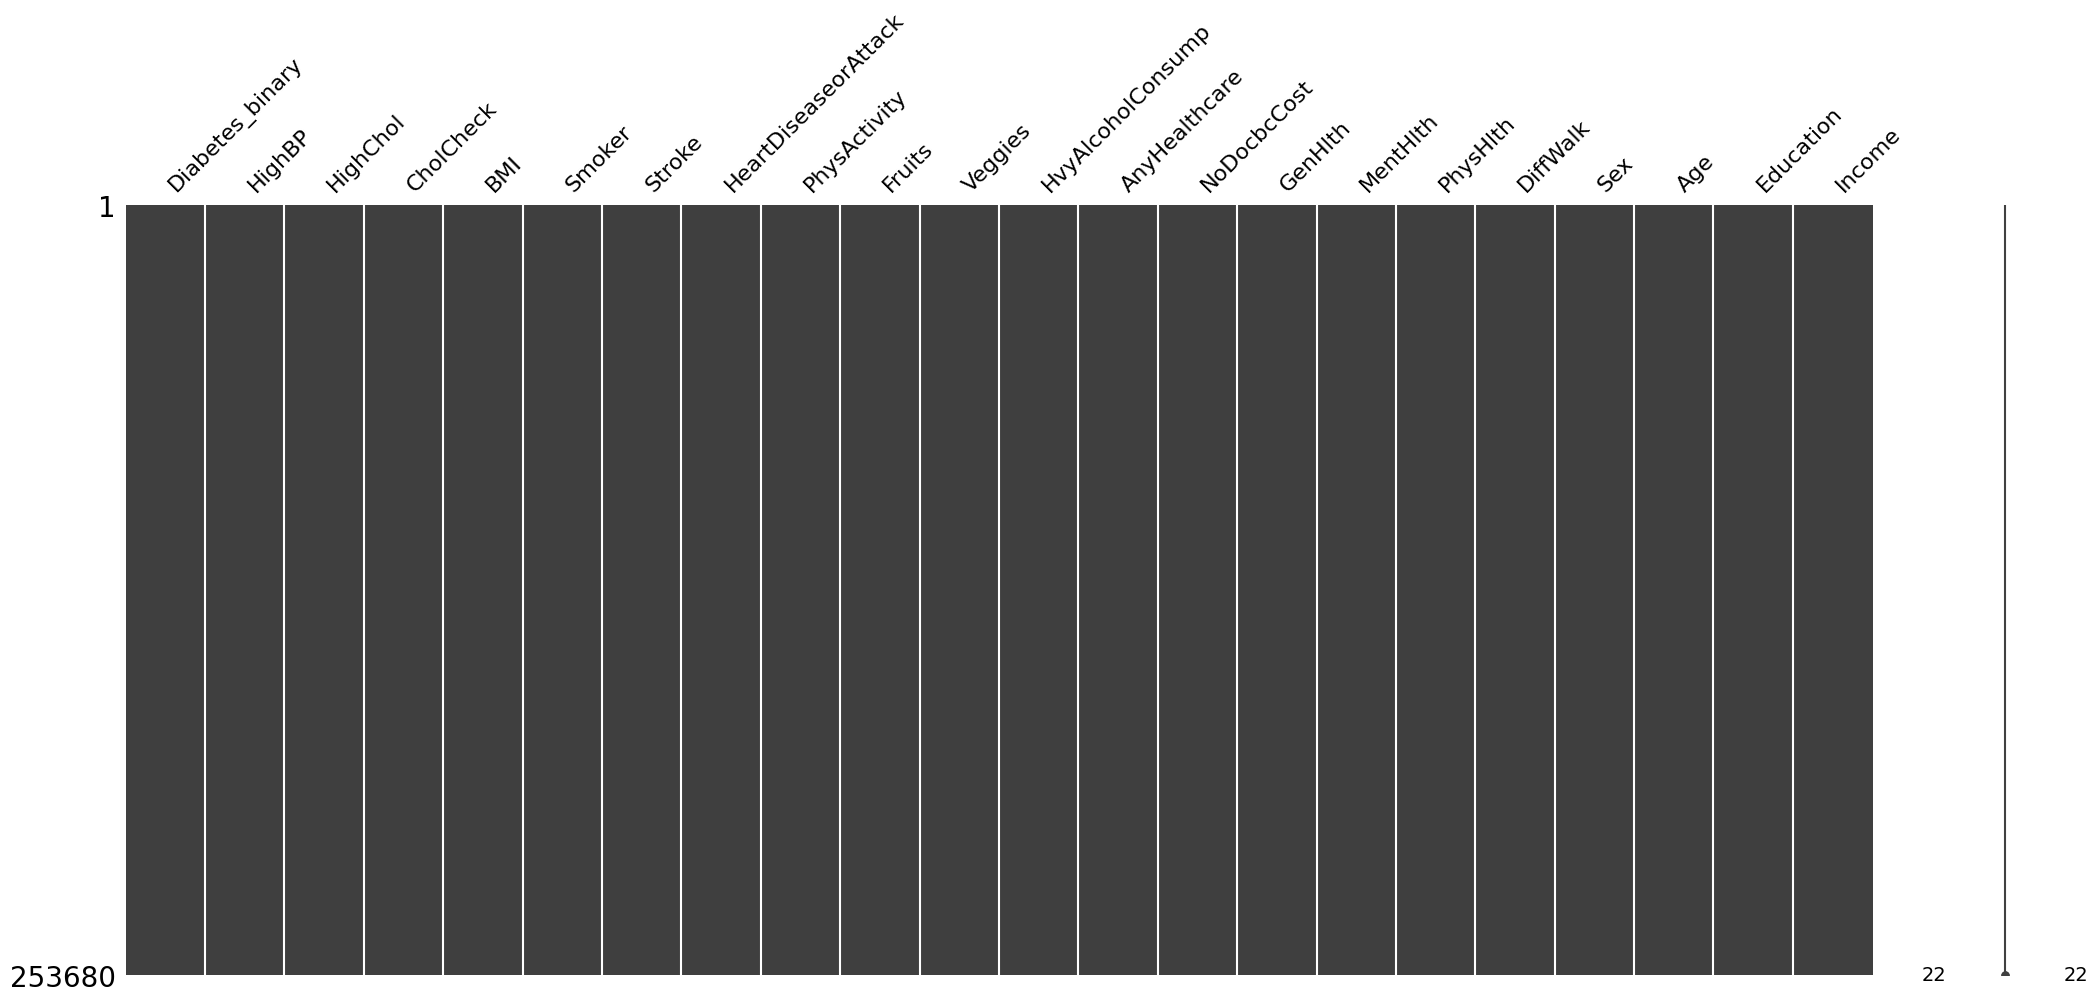

In [8]:
# Visualize missing values using missingno
msno.matrix(df)


```
The dataset has no missing values across all columns, which is helpful for analysis without needing imputation.

```

### Identifing outliers

In [9]:
# Identify outliers using the Interquartile Range (IQR) method for key numerical columns
numerical_columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth']
outliers = {}

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_indices = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))].index
    outliers[col] = len(outlier_indices)

outliers


{'BMI': 9847, 'GenHlth': 12081, 'MentHlth': 36208, 'PhysHlth': 40949}

```
we identified a significant number of outliers in several key variables:

* BMI: 9,847 entries are outside the typical range, suggesting extreme values that could be due to measurement errors
or accurate reports of unusual cases.

* General Health (GenHlth): 12,081 outliers indicate ratings that are exceptionally high or low compared to the median.

* Mental Health (MentHlth) and Physical Health (PhysHlth): Both show a high number of outliers (36,208 and 40,949 respectively),
which likely represent extreme cases of mental and physical health issues reported by individuals.

```


In [10]:
# Appling a logarithmic transformation to reduce skewness in the data
data_transformed = df.copy()
skewed_columns = ['BMI', 'MentHlth', 'PhysHlth']

for col in skewed_columns:
    df[col] = np.log(data_transformed[col] + 1)  # Log transform to normalize data


### Drop Duplicate values

In [11]:
df.drop_duplicates(inplace=True)


In [12]:
df.shape

(229474, 22)

### Identify numerical features with less than a certain threshold of unique values to consider them categorical


In [13]:

# Verifing which numerical features are actually categorical
# Assuming that if a numerical feature has a small number of unique values, it might be categorical
unique_counts = df.nunique().sort_values()

# Identify numerical features with less than a certain threshold of unique values to consider them categorical
threshold = 10 # This threshold can be adjusted based on domain knowledge
potential_categoricals = unique_counts[unique_counts <= threshold].index.tolist()

potential_categoricals_df = pd.DataFrame({
    'Feature': potential_categoricals,
    'Unique Values': [df[feature].unique() for feature in potential_categoricals]
})

potential_categoricals_df

,Feature,Unique Values
0,Diabetes_binary,"[0.0, 1.0]"
1,Sex,"[0.0, 1.0]"
2,DiffWalk,"[1.0, 0.0]"
3,NoDocbcCost,"[0.0, 1.0]"
4,AnyHealthcare,"[1.0, 0.0]"
5,HvyAlcoholConsump,"[0.0, 1.0]"
6,Fruits,"[0.0, 1.0]"
7,PhysActivity,"[0.0, 1.0]"
8,Veggies,"[1.0, 0.0]"
9,Stroke,"[0.0, 1.0]"


In [14]:
# Convert potential categorical features to 'category' data type
for feature in potential_categoricals:
    df[feature] = df[feature].astype('category')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Diabetes_binary       229474 non-null  category
 1   HighBP                229474 non-null  category
 2   HighChol              229474 non-null  category
 3   CholCheck             229474 non-null  category
 4   BMI                   229474 non-null  float64 
 5   Smoker                229474 non-null  category
 6   Stroke                229474 non-null  category
 7   HeartDiseaseorAttack  229474 non-null  category
 8   PhysActivity          229474 non-null  category
 9   Fruits                229474 non-null  category
 10  Veggies               229474 non-null  category
 11  HvyAlcoholConsump     229474 non-null  category
 12  AnyHealthcare         229474 non-null  category
 13  NoDocbcCost           229474 non-null  category
 14  GenHlth               229474 non-null  ca

```
We have reduced the outliers, dropped duplicates and also Converted potential categorical features to 'category' data type

```

## Exploratorty Data Analysis

Diabetes_binary         1.000000
GenHlth                 0.276940
HighBP                  0.254318
BMI                     0.215190
DiffWalk                0.205302
HighChol                0.194944
Age                     0.177263
HeartDiseaseorAttack    0.168213
PhysHlth                0.153088
Stroke                  0.099193
CholCheck               0.072523
Smoker                  0.045504
MentHlth                0.036302
Sex                     0.032724
AnyHealthcare           0.025331
NoDocbcCost             0.020048
Fruits                 -0.024805
Veggies                -0.041734
HvyAlcoholConsump      -0.065950
PhysActivity           -0.100404
Education              -0.102686
Income                 -0.140659
Name: Diabetes_binary, dtype: float64


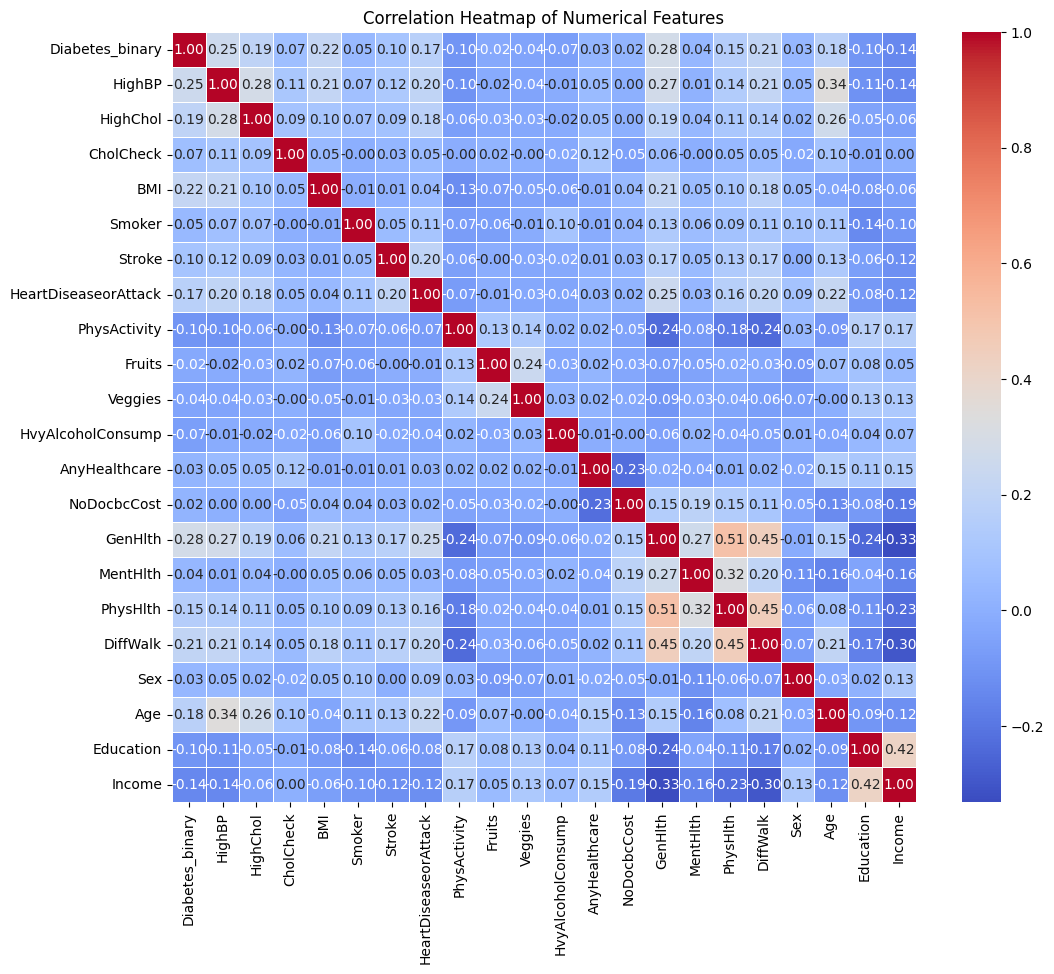

In [16]:

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()

# Focusing on the 'Diabetes_binary' column to see how each feature correlates with the target
diabetes_correlation = correlation_matrix['Diabetes_binary'].sort_values(ascending=False)
print(diabetes_correlation)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


```

The correlation heatmap visualizes the relationships between features:

* High Correlations: The strongest positive correlations appear between 'HighBP' and 'HighChol', 'HighBP' and 'HeartDiseaseorAttack',
'GenHlth' and 'PhysHlth', and 'GenHlth' and 'DiffWalk', indicating that people with high blood pressure are likely to have high
cholesterol and heart diseases, and those who rate their general health poorly often report more physical health problems and
difficulty walking.

* Diabetes (Diabetes_binary): This variable has moderate positive correlations with 'HighBP', 'HighChol', 'BMI', and 'Age',
suggesting that older individuals with higher BMI, blood pressure, and cholesterol levels have a higher prevalence of diabetes.

* Negative Correlations with Physical Activity (PhysActivity): There are notable negative correlations between 'PhysActivity'
and 'Diabetes_binary', 'HighBP', 'HighChol', 'BMI', and 'GenHlth', indicating that higher physical activity is associated with
better health outcomes and lower diabetes prevalence.

* Socio-economic Factors: 'Education' and 'Income' show positive correlations with 'PhysActivity' and negative correlations with
'Diabetes_binary', 'HighBP', 'BMI', 'GenHlth', suggesting that higher socioeconomic status is linked to better
health and lifestyle choices.

* Lifestyle Factors: 'Smoker' and 'HvyAlcoholConsump' have weaker correlations with health outcomes compared to other factors,
which might indicate a more complex relationship or the presence of confounding variables not accounted for in the dataset.
```

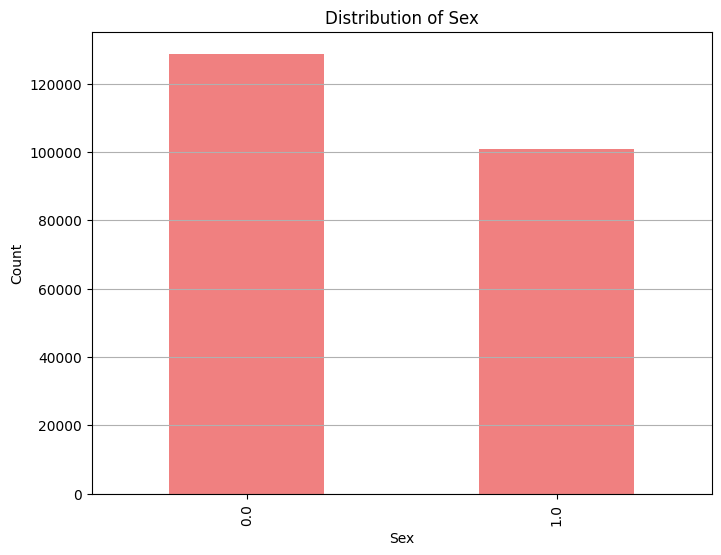

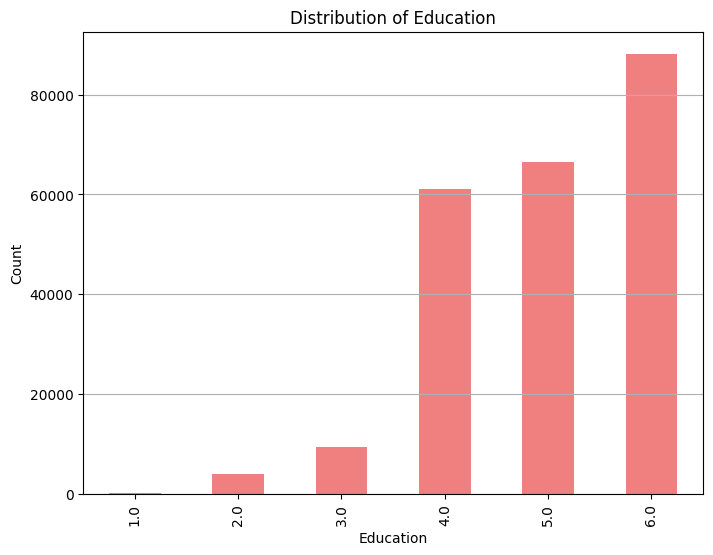

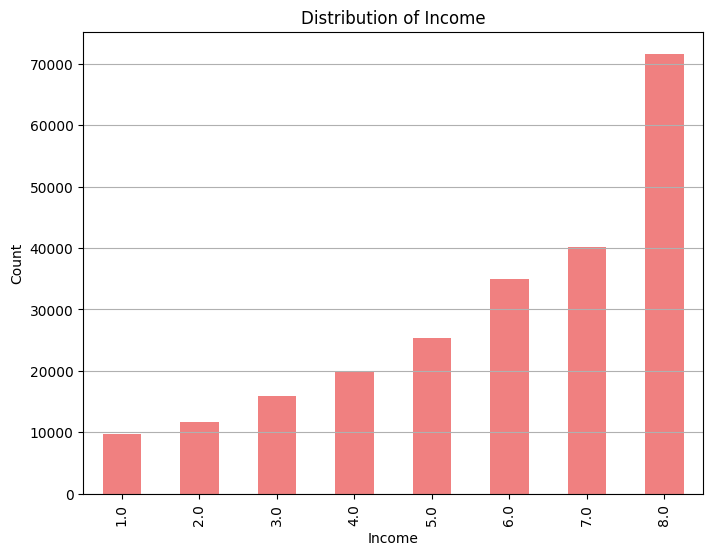

In [17]:
categorical_features = ['Sex', 'Education', 'Income']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    df[feature].value_counts().sort_index().plot(kind='bar', color='lightcoral')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(axis='y')
    plt.show()


```
* While sex has a relatively small correlation with diabetes incidence in our data, it might still play an important role
 when interacting with other variables.
* Education and income are negatively correlated with diabetes, indicating that as these increase, the likelihood of diabetes
 decreases. This trend is something our model should capture.
```

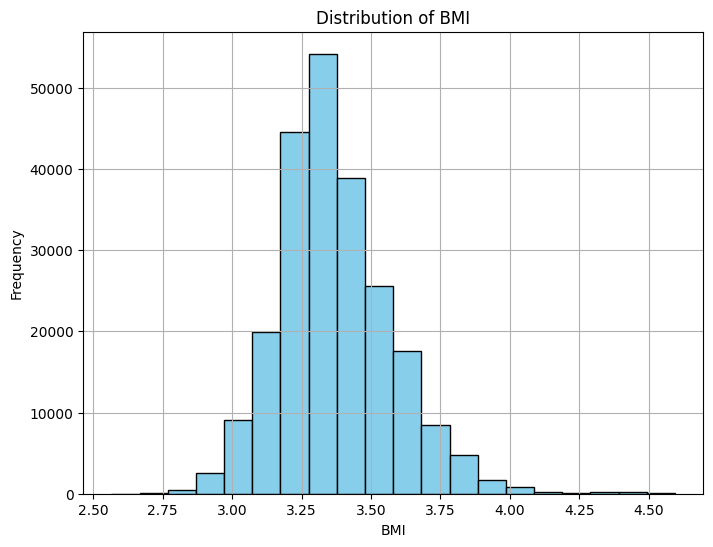

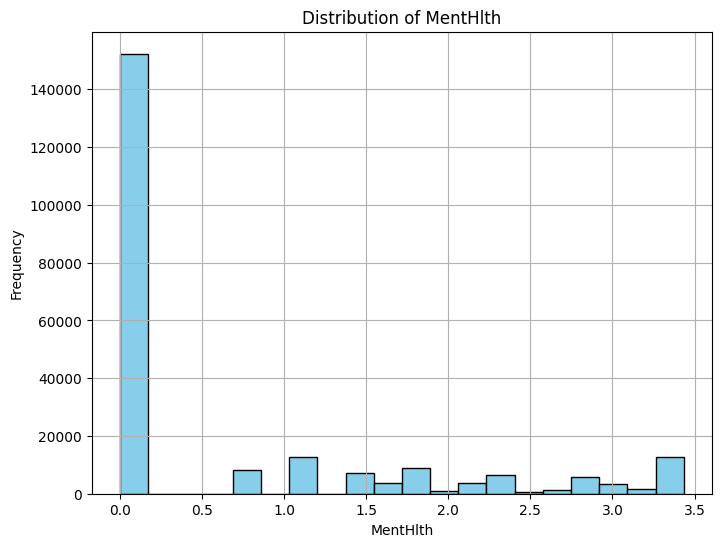

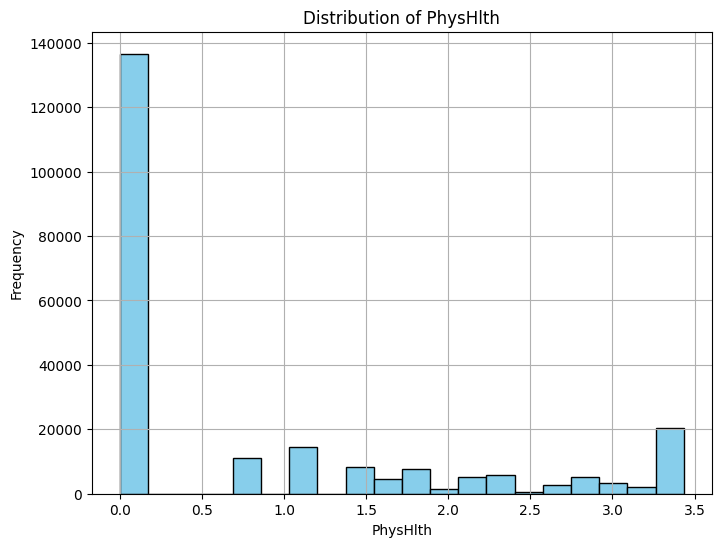

In [18]:
numerical_features = ['BMI', 'MentHlth', 'PhysHlth']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


```
* BMI: Given the distribution, BMI is likely an important feature for predicting diabetes, aligning with medical understanding
that higher BMI can be a risk factor for diabetes.

* Mental Health and Physical Health: While there are fewer people reporting many days of poor health, these variables could still
be important for our model. Chronic health issues captured by these variables may significantly impact the risk of diabetes.
```

[Text(0.5, 1.0, 'Count of Diabetes Status')]

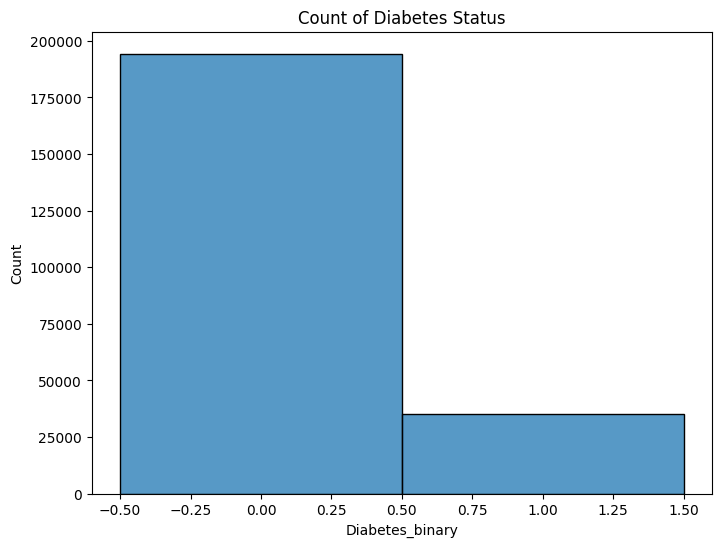

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Diabetes_binary'],bins=2).set(title='Count of Diabetes Status')

```
* The left bar ( representing a Diabetes_binary value of 0) is significantly taller than the right bar (representing a
 Diabetes_binary value of 1), indicating that the number of non-diabetic cases far outweighs the diabetic cases in your dataset.

* This class imbalance can affect the performance of our machine learning models, as they may tend to predict the majority
class (non-diabetic) more often.
```


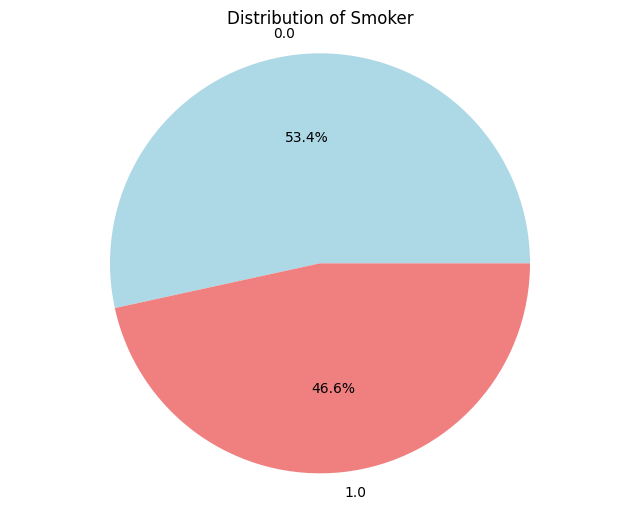

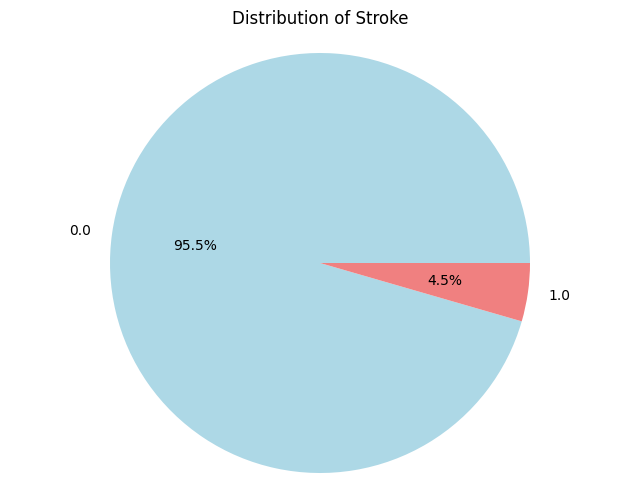

In [20]:
binary_features = ['Smoker', 'Stroke']
for feature in binary_features:
    plt.figure(figsize=(8, 6))
    df[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
    plt.title(f'Distribution of {feature}')
    plt.ylabel('')
    plt.axis('equal')
    plt.show()


```
* Approximately 46.6% of the individuals in our dataset are smokers. This near even split provides a good basis for analyzing the impact of smoking on
diabetes within our model.

* A small percentage (4.5%) of the dataset reported having a stroke. This is a critical medical event that can have a strong
relationship with diabetes.
```

<Figure size 1000x800 with 0 Axes>

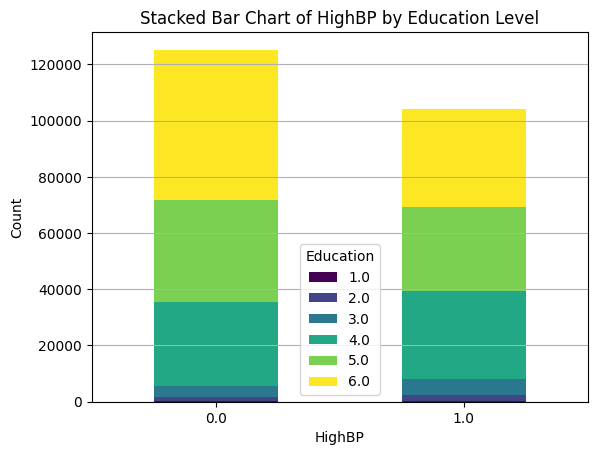

In [21]:
plt.figure(figsize=(10, 8))
pd.crosstab(df['HighBP'], df['Education']).plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Stacked Bar Chart of HighBP by Education Level')
plt.xlabel('HighBP')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


```
This chart shows the prevalence of high blood pressure (HighBP) across different education levels. There appears to be a relatively
even distribution of high blood pressure across all education levels among those who do not have high blood pressure.

However, for individuals with high blood pressure, there seems to be a higher prevalence in the categories with higher
education levels.

This could indicate that while education often correlates with better health outcomes, high blood pressure is a common condition
that affects a broad segment of the population, possibly diluting the protective effect of higher education.

```

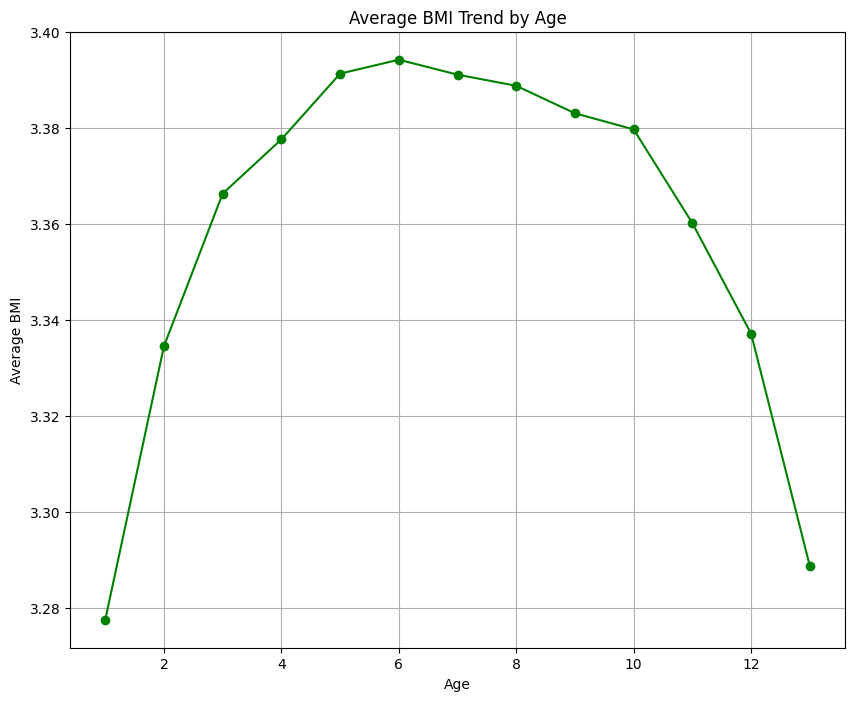

In [22]:
plt.figure(figsize=(10, 8))
plt.plot(df.groupby('Age')['BMI'].mean(), marker='o', linestyle='-', color='green')
plt.title('Average BMI Trend by Age')
plt.xlabel('Age')
plt.ylabel('Average BMI')
plt.grid(True)
plt.show()


```
* The line graph suggests that the average BMI peaks in the middle age categories and then declines in the older age categories.
* These trends are important for understanding how age and BMI interact, which can inform how the model interprets these variables
in the context of diabetes risk.
```

## Defining featrures and target variable

Based on the insights from your data visualizations and correlation analysis, here is how you can choose your features (X) and target variable (y) for our diabetes prediction model:

>Target Variable (y):
Diabetes_binary: This is our target variable, as it indicates the presence (1) or absence (0) of diabetes.

>Predictor Variables (X):
* Demographics: Age and Sex, as these are fundamental demographic variables.
* BMI: Given its distribution and its known relationship with diabetes.
* Smoking Status (Smoker): Nearly half of the dataset consists of smokers, and smoking is a risk factor for diabetes.
* Stroke History (Stroke): While it affects a small percentage of the population, the medical severity of a stroke makes it a potentially strong predictor.
* High Blood Pressure (HighBP): HighBP is a known risk factor for diabetes and is well-represented across education levels in your dataset.
* General Health (GenHlth): As the variable with the highest positive correlation to Diabetes_binary, it's a key indicator of overall health.
* Education Level (Education): Despite the similar prevalence of HighBP across education levels, the overall negative correlation with diabetes suggests it may influence diabetes risk.
* Income Level (Income): It has a significant negative correlation with diabetes incidence, indicating socioeconomic factors might play a role in diabetes risk.
* Physical Activity (PhysActivity): With a significant negative correlation, this indicates that more active individuals have a lower risk of diabetes.


In [28]:

# First, let's separate the features from the target variable for preprocessing.
X = df[['Age', 'Sex', 'BMI', 'Smoker', 'Stroke', 'HighBP', 'GenHlth', 'Education', 'Income', 'PhysActivity']]
y = df['Diabetes_binary']



In [29]:

# Select numerical columns (which are not dummy variables)
num_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Normalize the numerical features
scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])



In [30]:

# Split with 80% training data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Further split the training data into training and validation sets (80%-20% split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Now we have 64% training, 16% validation, and 20% test relative to the original dataset
X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape

((146863, 10), (146863,), (45895, 10), (45895,), (36716, 10), (36716,))

## Building ML algorithm

```
Given our imbalanced dataset and the selected features, here are four classification models that can be considered alongside
a decision tree for our diabetes prediction task:

* Decision Tree Classifier: This model is easy to interpret and can handle both numerical and categorical data.
It's a good starting point to understand the basic relationships in your data.

* Random Forest Classifier: An ensemble model that uses multiple decision trees and averages their predictions. Random Forest is
less likely to overfit than a single decision tree and can handle the imbalanced dataset by constructing a more robust
decision boundary.

* Gradient Boosting Machines (GBM): Another ensemble technique that builds trees sequentially with each tree trying to correct
the mistakes of the previous ones. GBMs often perform very well on imbalanced datasets and can provide feature importance scores,
which could be insightful for your analysis.

* Logistic Regression with Class Weight Adjustment: Logistic regression is a simple yet effective model for binary
classification tasks. By adjusting the class weight parameter, you can compensate for the imbalance in the dataset.

```
Evaluation ❎

Confusion Matrix: This visualization helps in identifying the types of errors made by the classifier, such as mixing up between classes.

Learning Curves:
A gap between the training and validation scores suggests a high variance scenario, where the model could be overfitting to the training data.If both curves plateau but with low scores, the model might be underfitting.



In [31]:
# Initialize the models

decision_tree_model = DecisionTreeClassifier(class_weight='balanced',random_state=42)
random_forest_model = RandomForestClassifier(class_weight='balanced',n_estimators=100, random_state=42)
logreg_model = LogisticRegression(class_weight='balanced',max_iter=1000, random_state=42)
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
xgb_model = XGBClassifier(scale_pos_weight=ratio, enable_categorical=True,random_state=42)


# Create a list to store each model and its corresponding name
models = [
    (random_forest_model,"Random Forest Classifier"),
    (logreg_model, "Logistic Regression"),
    (xgb_model, "XGBClassifier"),
    (decision_tree_model, "Decision Tree")]

# Dictionary to hold model scores for comparison
model_scores = {}


In [32]:


# Define function to plot learning curves
def plot_learning_curves(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, train_sizes=np.linspace(0.1, 1.0, 10),
        cv=3, scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()



Decision Tree Accuracy: 0.7463776010458656
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.82      0.84     31055
         1.0       0.27      0.36      0.31      5661

    accuracy                           0.75     36716
   macro avg       0.57      0.59      0.58     36716
weighted avg       0.78      0.75      0.76     36716



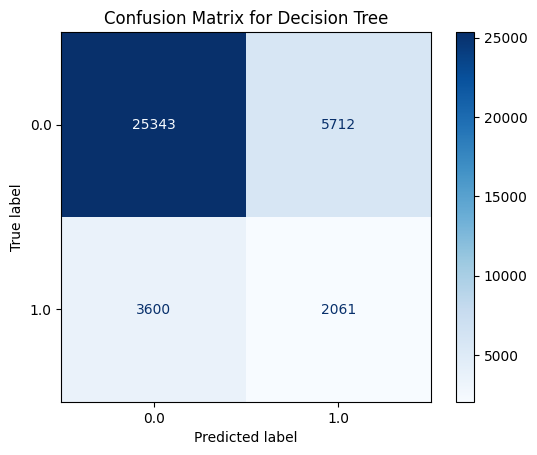

In [33]:
decision_tree_model.fit(X_train, y_train)
y_pred_dtree= decision_tree_model.predict(X_val)
accuracy_dtree = accuracy_score(y_val, y_pred_dtree)
report_dtree = classification_report(y_val, y_pred_dtree)
model_scores["Decision Tree"] = accuracy_dtree

print("Decision Tree Accuracy:", accuracy_dtree)
print("Classification Report:\n", report_dtree)
# Calculate the confusion matrix
cm_dtree = confusion_matrix(y_val, y_pred_dtree)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dtree, display_labels=decision_tree_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree')
plt.show()


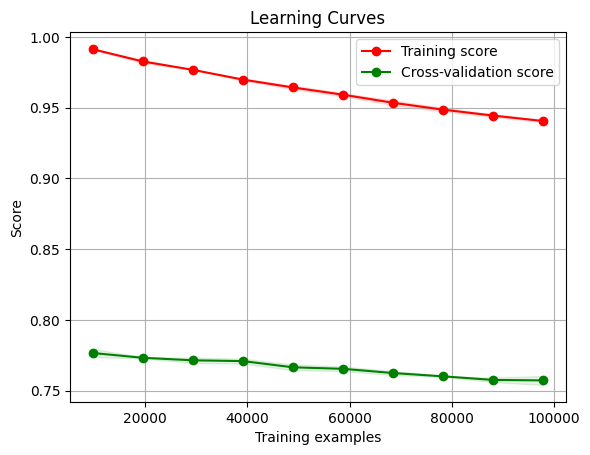

In [34]:
# Apply the plotting function to the Decision Tree model
plot_learning_curves(decision_tree_model, X_train, y_train)


```
The model's overall accuracy is skewed by the class imbalance. It performs well on the majority class but poorly on the
minority class, which is often the class of higher interest in medical diagnostics.

However, there is a significant gap between the training score and the cross-validation score, suggesting
that the model might be overfitting to the training data.
```

Random Forest Classifier Accuracy: 0.7992973090750627
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.90      0.88     31055
         1.0       0.32      0.27      0.29      5661

    accuracy                           0.80     36716
   macro avg       0.60      0.58      0.59     36716
weighted avg       0.79      0.80      0.79     36716



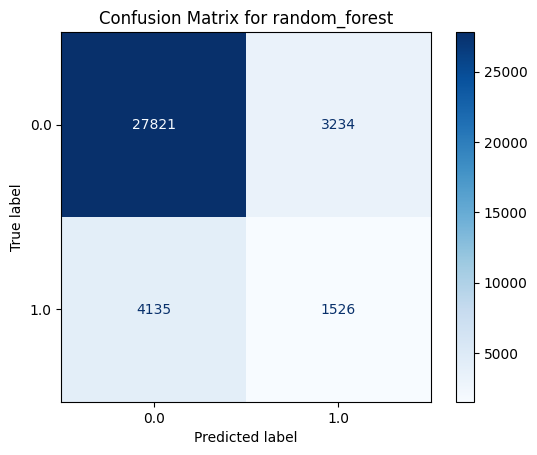

In [35]:
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
model_scores["Random Forest Classifier"] = accuracy_rf
report_rf= classification_report(y_val, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)
print("Classification Report:\n", report_rf)

# Calculate the confusion matrix
cm_rftree = confusion_matrix(y_val, y_pred_rf)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rftree, display_labels=random_forest_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for random_forest')
plt.show()


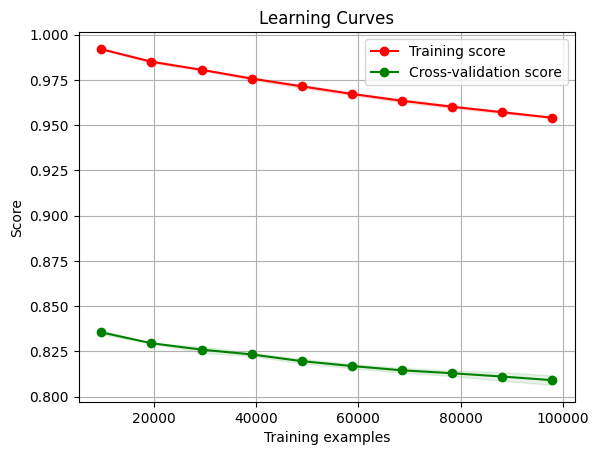

In [36]:
plot_learning_curves(random_forest_model, X_train, y_train)


```
The Random Forest model performs better than the Decision Tree model, with higher accuracy and a better balance between precision
and recall for the negative class. However, similar to the Decision Tree model, it struggles with predicting the positive
class (diabetes), which is a significant concern.

The smaller gap between training and validation scores compared to the Decision Tree model suggests better generalization, but
there's still room for improvement.

```


Logistic Regression Accuracy: 0.7096905981043686
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.70      0.80     31055
         1.0       0.32      0.75      0.44      5661

    accuracy                           0.71     36716
   macro avg       0.63      0.73      0.62     36716
weighted avg       0.84      0.71      0.75     36716



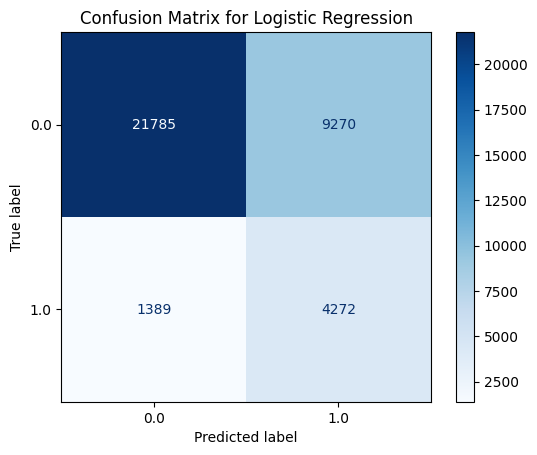

In [37]:
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_val)
accuracy_logreg = accuracy_score(y_val, y_pred_logreg)
report_logreg = classification_report(y_val, y_pred_logreg)
model_scores["Logistic Regression"] = accuracy_logreg

print("Logistic Regression Accuracy:", accuracy_logreg)
print("Classification Report:\n", report_logreg)


# Calculate the confusion matrix
cm_logreg = confusion_matrix(y_val, y_pred_logreg)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

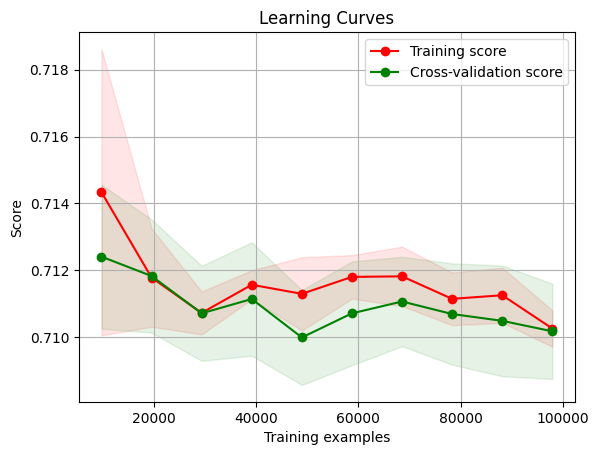

In [38]:
plot_learning_curves(logreg_model, X_train, y_train)


```
The learning curves for Logistic Regression are quite close together, which typically suggests that the model is not overfitting and
has a good generalization to unseen data.

Both the training and cross-validation scores are relatively low, indicating that the model may be underfitting
or that the dataset is challenging to model with a linear approach.

The Logistic Regression model has a high recall for the diabetes class, which is important in a medical context to ensure
that as few cases as possible are missed.

However, the high number of false positives (reflected in the low precision for the diabetes class) suggests that the model might
not be discriminative enough.

The model seems to be more biased towards predicting the positive class compared to the Decision Tree and Random Forest models.

```

XGBClassifier Accuracy: 0.7038076043141954
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.69      0.80     31055
         1.0       0.31      0.76      0.44      5661

    accuracy                           0.70     36716
   macro avg       0.63      0.73      0.62     36716
weighted avg       0.84      0.70      0.74     36716



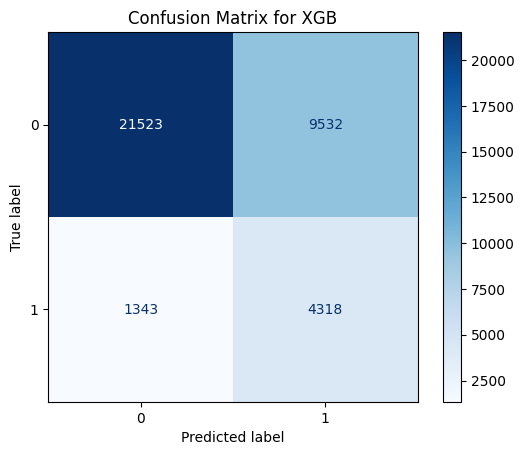

In [39]:
# Fit the model on the training data
xgb_model.fit(X_train, y_train)
y_pred_xgb= xgb_model.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
report_xgb = classification_report(y_val, y_pred_xgb)
model_scores[" XGBClassifier"] = accuracy_xgb

print("XGBClassifier Accuracy:", accuracy_xgb)
print("Classification Report:\n", report_xgb)


# Calculate the confusion matrix
cm_logxgb = confusion_matrix(y_val, y_pred_xgb)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logxgb, display_labels=xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGB')
plt.show()

```

The XGBoost model is doing a good job in terms of recall for the positive class, which is essential for a medical diagnosis model
where identifying positive cases is crucial.

However, like the Logistic Regression model, it suffers from a high number of false positives, as indicated by the
lower precision for class 1.
```

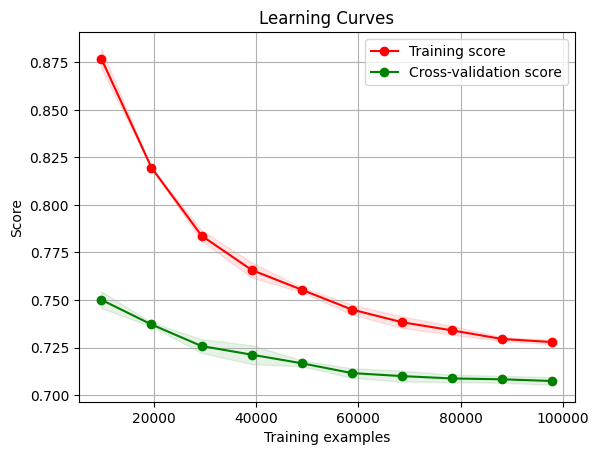

In [40]:
plot_learning_curves(xgb_model, X_train, y_train)


```

The learning curves shows the training score starting quite high and then steeply declining as more examples are added, which is
normal as it is harder for the model to fit a larger dataset.

The cross-validation score increases slightly as more data is added, but both scores seem to converge at a point, which suggests
the model is starting to generalize better to the data.

The convergence of training and cross-validation scores indicates that the model may not improve much from additional data,
which could be a sign of underfitting.

```


### Insights

```

Decision Tree Classifier:
Accuracy: 74.64%
The decision tree has a decent recall for the negative class but struggles with precision and recall for the positive class, which
indicates potential issues with overfitting or underfitting.

Random Forest Classifier:
Accuracy: 79.93%
As an ensemble of decision trees, the Random Forest performs better overall compared to a single Decision Tree, particularly
in accuracy and the balance between precision and recall.

Gradient Boosting Classifier and Logistic Regression:
Accuracy: Around 70-71%
These models show high recall for the positive class but significantly lower precision, suggesting they are better at
identifying true positives but at the cost of increased false positives.
```

### Demonstrate concepts

```

Low Recall for Positive Class: The significant low recall for the minority class (1.0) suggests that the models are not capturing
the majority of positive cases effectively. This is a typical symptom of a model that may be overfitting to the majority class or
underfitting the minority class due to class imbalance or insufficient model complexity to capture the patterns in minority class.

* Overfitting happens when the model captures too much noise from the data and underfitting occurs when the model is not enough
to capture the underlying patterns of the data.


High Accuracy but Low Recall: This indicates that the models are biased towards predicting the majority class well but not the
minority class. While the overall accuracy is high, the models fail to serve the purpose if predicting the minority class is crucial.

```

```
Solutions
1. Addressing Class Imbalance: Use techniques like SMOTE for oversampling the minority class or adjust class weights in the model
training process to make the model pay more attention to the minority class.

2. Cross-Validation: Implementing more rigorous cross-validation can help ensure that the model's performance is stable across
different subsets of data and is not just tuned to perform well on a specific train-test split.

3. Hyper parameter tuning or using ensemble methods might help improve the model's ability to generalize by combining predictions
from multiple models.

```


### Use Optimizer

> The best-performing model is the Random Forest Classifier, which had an accuracy of approximately 79.93%.

1. We have used SGD with logistic regression

2. Decision Trees & Random Forest models do not use gradient descent in their traditional forms because they are based on entropy or gini impurity calculations for splitting nodes, not on error gradient minimization.

3. So we can use an ensemble method that uses gradient descent, like Gradient Boosting Trees (another form of boosting different from XGB) which could potentially yield better performance for optimization.

4. For models like Random Forest, optimization typically involves tuning hyperparameters to find the best configuration for model training. Another efficient method for hyperparameter optimization is to use Randomized Search or Grid Search with cross-validation.

Validation Accuracy: 0.8481860769146966
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     31055
         1.0       0.53      0.13      0.20      5661

    accuracy                           0.85     36716
   macro avg       0.70      0.55      0.56     36716
weighted avg       0.81      0.85      0.81     36716



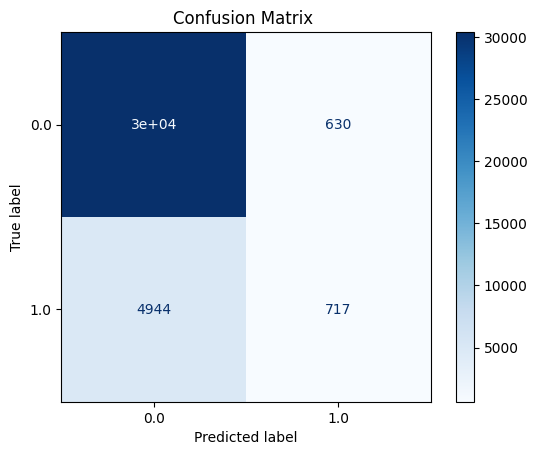

In [41]:


# Define the model with logistic regression loss
sgd_logistic = SGDClassifier(loss='log', max_iter=1000, tol=1e-3,random_state=42)

# Train the model
sgd_logistic.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = sgd_logistic.predict(X_val)
# Evaluate the model
sgd_accuracy =  accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", sgd_accuracy)
# Evaluate the model
print(classification_report(y_val, y_val_pred))
model_scores["sgd_logistic_regression"] = sgd_accuracy



# Calculate the confusion matrix
cm_sgd = confusion_matrix(y_val, y_val_pred)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_sgd, display_labels=sgd_logistic.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix ')
plt.show()


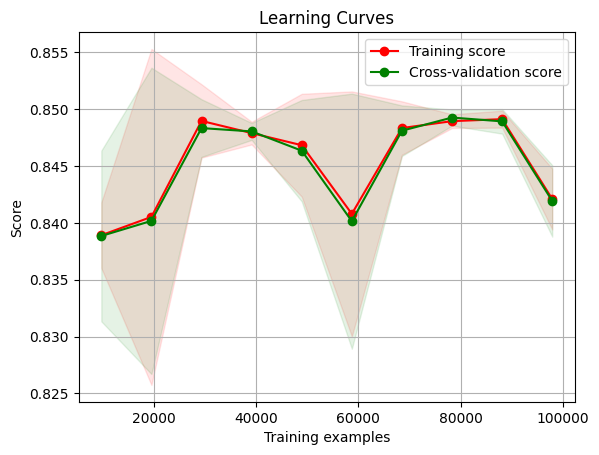

In [42]:
plot_learning_curves(sgd_logistic, X_train, y_train)


```
The learning curves for the SGDClassifier are quite stable, with the training and cross-validation scores being close
to each other throughout the range of training examples. This is a good indication that the model is generalizing well.

The scores are moderately high, which suggests a decent fit to the data without major overfitting or underfitting issues.

The SGDClassifier performs very well for the negative class but not as well for the positive class, particularly in
terms of recall. This might mean it's not suitable as a standalone model for medical diagnosis where missing
positive cases can be very costly.

```


Validation Accuracy: 0.8516722954570215
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     31055
         1.0       0.58      0.14      0.23      5661

    accuracy                           0.85     36716
   macro avg       0.72      0.56      0.57     36716
weighted avg       0.82      0.85      0.81     36716



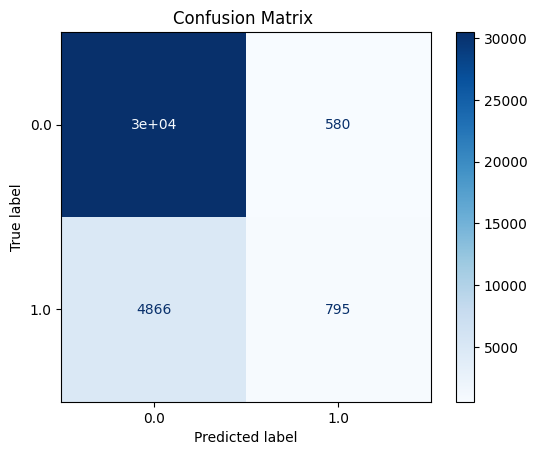

In [43]:

# Define the model
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model
gb_clf.fit(X_train, y_train)



# Predict on the validation set
y_val_pred = gb_clf.predict(X_val)
# Evaluate the model
gbc_accuracy =  accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", gbc_accuracy)
# Evaluate the model
print(classification_report(y_val, y_val_pred))
model_scores["GradientBoostingClassifier"] = gbc_accuracy


# Calculate the confusion matrix
cm_gbc= confusion_matrix(y_val, y_val_pred)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gbc, display_labels=gb_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix ')
plt.show()


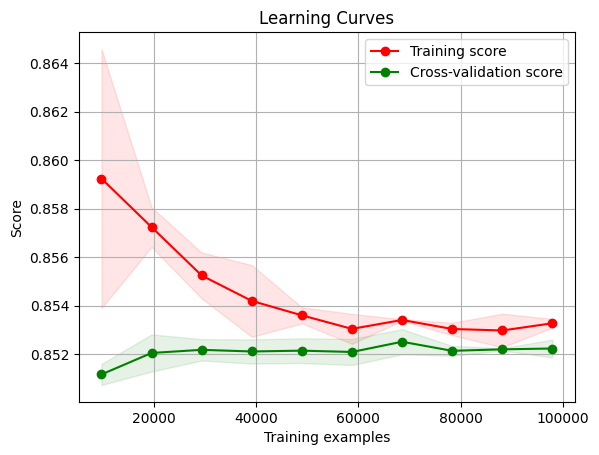

In [44]:
plot_learning_curves(gb_clf, X_train, y_train)


```
Both the SGD-optimized logistic regression model and the gradient boosting model have yielded very similar performance metrics on
our validation set. Both models have achieved an accuracy of about 84.82%, with a high precision and recall for the
negative class (0.0), but relatively low precision and very low recall for the positive class (1.0).

The learning curves show that the training and cross-validation scores are close together, which usually indicates good
generalization.

Given the importance of not missing true positive cases in medical diagnoses, the low recall for the
diabetes class is a significant concern.

```


## Hyperparameter Tuning:

Hyperparameter tuning is crucial for optimizing machine learning models to achieve the best performance. For tuning a Gradient Boosting model, you can use both Grid Search and Random Search, similar to how you would for other models.

Important Hyperparameters for Gradient Boosting
* n_estimators: Number of boosting stages to perform. More stages can lead to a better model but also to overfitting.
* learning_rate: Controls the contribution of each tree. There is a trade-off between learning rate and number of trees.
* max_depth: Maximum depth of the individual regression estimators. Controls the complexity of the model.

In [45]:

# Define the model
gbc = GradientBoostingClassifier(random_state=42)

# Set up the parameter grid to focus only on n_estimators, learning_rate, and max_depth
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages to perform
    'learning_rate': [0.01, 0.1, 0.2],  # Controls the contribution of each tree
    'max_depth': [3, 5, 7]  # Maximum depth of the individual regression estimators
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best accuracy found:  0.8524407153675732


Validation Accuracy: 0.8514544067981261
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     31055
         1.0       0.58      0.14      0.22      5661

    accuracy                           0.85     36716
   macro avg       0.72      0.56      0.57     36716
weighted avg       0.82      0.85      0.81     36716



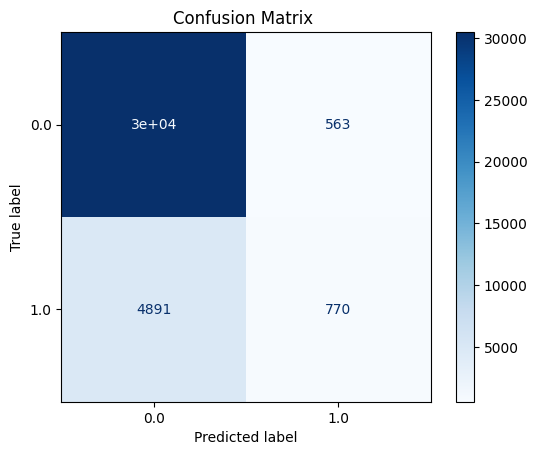

In [46]:

# Retrain the model with the best parameters found
best_params = grid_search.best_params_
gbc_best = GradientBoostingClassifier(**best_params,random_state=42)
gbc_best.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = gbc_best.predict(X_val)

# Calculate accuracy on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy_val)
model_scores["GridSearch_GBClassifier"] = accuracy_val


# Generate and print the classification report
class_report = classification_report(y_val, y_val_pred)
print("Classification Report:\n", class_report)


# Calculate the confusion matrix
cm_gbc_best= confusion_matrix(y_val, y_val_pred)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gbc_best, display_labels=gbc_best.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix ')
plt.show()

```
Best Parameters: The optimal parameters found through the grid search are a
* learning rate = 0.1
* max depth = 3
* estimators = 300.

Best Accuracy: The best accuracy obtained from the grid search is 85.24%, which is a good performance for this model.

The Gradient Boosting model with the optimal parameters is still biased towards the majority class, as indicated by the
high recall for class 0 and low recall for class 1.

```

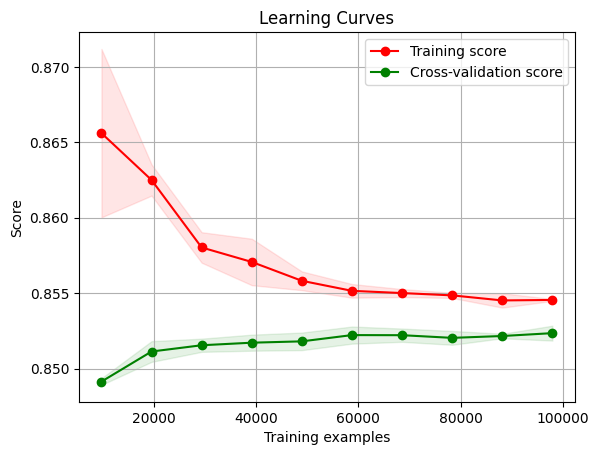

In [47]:
plot_learning_curves(gbc_best, X_train, y_train)


```
The learning curves shows a consistent generalization performance, with a small gap between the training and cross-validation
 scores. This indicates that the model is not overfitting.

The slight decline in the training score with more training examples suggests that the model's complexity is sufficient to handle
 more complex patterns in the data.

The validation results from our Gradient Boosting model after hyperparameter tuning show some improvements in specific areas but
 also highlight continuing challenges, particularly with the recall for the positive class (1.0).


```

### Applying SMOTHE Technique

```
To apply SMOTE to our dataset and then retrain our Gradient Boosting model using the best parameters obtained from the grid search,
* we need to apply SMOTE to the training data to balance it.
* retrain the Gradient Boosting model using the balanced training data
* evaluate the model on the original, unmodified validation set.

```

After SMOTE, counts of label '1': 124509
After SMOTE, counts of label '0': 124509
Validation Accuracy: 0.8420034862185424
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     31055
         1.0       0.48      0.30      0.37      5661

    accuracy                           0.84     36716
   macro avg       0.68      0.62      0.64     36716
weighted avg       0.82      0.84      0.83     36716



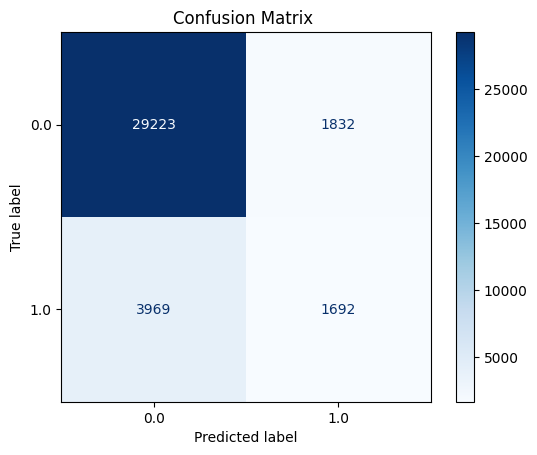

In [48]:


# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Print the class distribution after SMOTE
print("After SMOTE, counts of label '1':", sum(y_train_smote == 1))
print("After SMOTE, counts of label '0':", sum(y_train_smote == 0))


# Initialize the imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit on the training data and transform it
X_train_smote_imputed = imputer.fit_transform(X_train_smote)

# Retrain the model using the best parameters from Grid Search
best_params = grid_search.best_params_  # Assuming grid_search.best_params_ has been previously defined
gbc_best = GradientBoostingClassifier(**best_params)
gbc_best.fit(X_train_smote_imputed, y_train_smote)

# Predict on the validation set
y_val_pred = gbc_best.predict(X_val)

# Calculate accuracy and classification report on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)

print("Validation Accuracy:", accuracy_val)
print("Classification Report:\n", class_report)


# Calculate the confusion matrix
cm_gbc_best= confusion_matrix(y_val, y_val_pred)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gbc_best, display_labels=gbc_best.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix ')
plt.show()


```
Both classes now have 124,509 instances, which should give the model a fair chance to learn from both classes equally.

Accuracy: 84.15% - This is slightly lower than the previous accuracy before SMOTE, which is expected as the model now has to
deal with a more complex pattern after balancing the classes.

Precision & recall : The model's performance has improved for the minority class. The increase in recall for class 1 means the
model is now identifying more true cases of diabetes.

F1-Score This score indicates a good balance of precision and recall for the negative class and the positive
class after applying SMOTE.

```

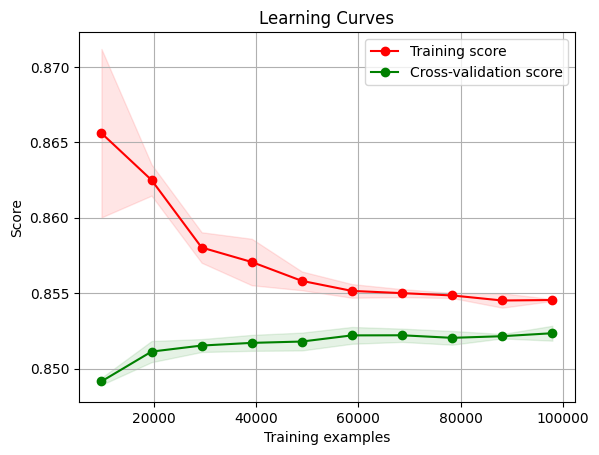

In [49]:
plot_learning_curves(gbc_best, X_train, y_train)


```

The learning curves remain close between training and validation, which suggests that the model generalizes well even after
addressing class imbalance.

The stability of the cross-validation score indicates that the model maintains its performance across different data sizes.


```

###  Further Improvements

```
* Adjusting the decision threshold might help increase recall further or balance the precision-recall trade-off
for the minority class.

* Enhancing the feature set or introducing new features could help the model make better distinctions between classes.

* Using methods like stacking or blending multiple models could improve prediction accuracy and balance.

* Using more than 3 folds might provide a more robust estimate of the model's performance and its variability
across different subsets of the data.

```

### Summary

The goal is to predict whether individuals have diabetes based on various health indicators. This is a classification problem where the positive class (having diabetes) is significantly less prevalent, indicating a class imbalance.

The Models Consideredc are Logistic Regression, Random Forest, Gradient Boosting and XGBoost. Based on the evaluation results

* Logistic Regression showed moderate accuracy and high recall for the positive class but has low precision, indicating a high number of false positives.
* Random Forest: Showed good accuracy and was effective in generalizing but had poor recall for the positive class, suggesting it struggled with the minority class.
* Gradient Boosting: Achieved high accuracy and the best balance between precision and recall among the models, especially after applying techniques like SMOTE.
* XGBoost: Similar to Gradient Boosting in terms of accuracy and precision/recall balance but slightly underperformed compared to the tuned Gradient Boosting model.

Given the class imbalance, the Accuracy and F1-Score metrics were crucial. While accuracy provides a general idea of overall performance, the F1-score is critical as it balances precision and recall, important when the cost of false negatives is high (missing a diabetes diagnosis). The ability of the model to handle imbalanced data through internal mechanisms or through effective response to techniques like SMOTE and consider the training and prediction time, especially relevant if the model needs to be deployed in a real-time scenario. While more complex models might offer better accuracy, simpler models are preferred for ease of interpretation and implementation.


Gradient Boosting is the selected algorithm for several reasons:

* It offered the highest accuracy and an improved recall for the positive class without excessively sacrificing precision, especially after applying SMOTE.
* Gradient Boosting demonstrated a significant improvement in handling class imbalance with the aid of SMOTE, indicating its sensitivity to data distribution and its ability to adapt.
* Although it is a complex model compared to Logistic Regression, its performance gains justify the increased complexity. Moreover, the ability to tune its parameters provided a way to manage overfitting and underfitting effectively.

Gradient Boosting's ability to sequentially correct errors and focus on difficult cases makes it particularly suited for datasets where predictive accuracy across an imbalanced class distribution is critical. Its performance in our evaluations showed that it could deliver robust predictions while maintaining a manageable level of computational demand and complexity.



